In [13]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Variables

In [14]:
dataset = 'df_stanford_real_features.csv'
#dataset = 'df_fifa_features_all.csv'

random_seed =1

## Reading and preparing datasets

In [15]:
df = pd.read_csv(dataset)


## Labels

In [16]:
labels = df['labels']
features = df.drop(columns = ['labels'])

# Balance of classes

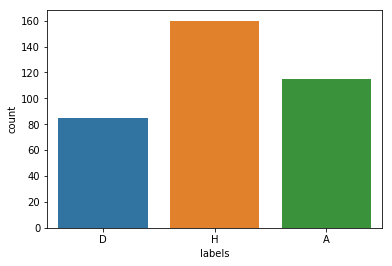

In [17]:

sns.countplot(labels,label="Count")

plt.show()

## Remove Rows With Missing Values

In [18]:
np.invert(df.isnull().any(axis=1))
labels = labels[np.invert(features.isnull().any(axis=1))]

# drop rows with missing values
features.dropna(inplace=True)


# Create Training and Test Sets and Apply Scaling

In [19]:
X = features
y = labels

y = y[np.invert(X.isnull().any(axis=1)).values]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=random_seed)

scaler = MinMaxScaler()
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


## Logistic regression

In [21]:


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.61
Accuracy of Logistic regression classifier on test set: 0.48


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## SVC

In [22]:
svm = SVC()
svm.fit(X_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.73
Accuracy of SVM classifier on test set: 0.53


## Let's try to convert the label to dummy variables

In [23]:
y_A = pd.get_dummies(y)['A']
X_train, X_test, y_train_A, y_test_A = train_test_split(X, y_A,random_state=random_seed)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train_A)

print('Accuracy of Logistic regression classifier D on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_A)))

print('Accuracy of Logistic regression classifier D on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_A)))






y_H = pd.get_dummies(y)['H']
X_train, X_test, y_train_H, y_test_H = train_test_split(X, y_H,random_state=random_seed)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train_H)

print('Accuracy of Logistic regression classifier H on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_H)))

print('Accuracy of Logistic regression classifier H on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_H)))





y_D = pd.get_dummies(y)['D']
X_train, X_test, y_train_D, y_test_D = train_test_split(X, y_D,random_state=random_seed)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train_D)

print('Accuracy of Logistic regression classifier D on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_D)))

print('Accuracy of Logistic regression classifier D on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_D)))

Accuracy of Logistic regression classifier D on training set: 0.74
Accuracy of Logistic regression classifier D on test set: 0.64
Accuracy of Logistic regression classifier H on training set: 0.70
Accuracy of Logistic regression classifier H on test set: 0.63
Accuracy of Logistic regression classifier D on training set: 0.76
Accuracy of Logistic regression classifier D on test set: 0.78


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by Min

In [24]:
y_A = pd.get_dummies(y)['A']
X_train, X_test, y_train_A, y_test_A = train_test_split(X, y_A,random_state=random_seed)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = SVC()
logreg.fit(X_train, y_train_A)

print('Accuracy of Logistic regression classifier D on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_A)))

print('Accuracy of Logistic regression classifier D on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_A)))






y_H = pd.get_dummies(y)['H']
X_train, X_test, y_train_H, y_test_H = train_test_split(X, y_H,random_state=random_seed)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = SVC()
logreg.fit(X_train, y_train_H)

print('Accuracy of Logistic regression classifier H on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_H)))

print('Accuracy of Logistic regression classifier H on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_H)))





y_D = pd.get_dummies(y)['D']
X_train, X_test, y_train_D, y_test_D = train_test_split(X, y_D,random_state=random_seed)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = SVC()
logreg.fit(X_train, y_train_D)

print('Accuracy of Logistic regression classifier D on training set: {:.2f}'
     .format(logreg.score(X_train, y_train_D)))

print('Accuracy of Logistic regression classifier D on test set: {:.2f}'
     .format(logreg.score(X_test, y_test_D)))

Accuracy of Logistic regression classifier D on training set: 0.70
Accuracy of Logistic regression classifier D on test set: 0.63
Accuracy of Logistic regression classifier H on training set: 0.69
Accuracy of Logistic regression classifier H on test set: 0.67
Accuracy of Logistic regression classifier D on training set: 0.76
Accuracy of Logistic regression classifier D on test set: 0.78


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid